In [10]:
import numpy as np



import os, random

import tensorflow
import keras
import matplotlib

import keras.preprocessing
import tensorflow as tf

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image


from pathlib import Path

In [11]:
myDir = Path("../input/pneumonia/Pneumonia")
myTrainDir = myDir / 'train'
myTestDir = myDir / 'test'
myValDir = myDir / 'val'
mySeed=2001
np.random.seed(mySeed)


imgWidth=150
imgHeight=150
if K.image_data_format()=="channels_first":
    input_shape =(3,imgWidth, imgHeight)
else:
    input_shape =(imgWidth, imgHeight,3)

In [3]:
dataGenerator=ImageDataGenerator(rescale = 1./255.0)
trainDataGenerator=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [13]:
myTrainData=trainDataGenerator.flow_from_directory(directory=myTrainDir, batch_size=32, target_size=(imgHeight,imgWidth), color_mode='rgb', class_mode='binary', seed=mySeed)

Found 5216 images belonging to 2 classes.


In [14]:
myTestData=dataGenerator.flow_from_directory(directory=myTestDir, batch_size=32, target_size=(imgHeight,imgWidth), color_mode='rgb', class_mode='binary',seed=mySeed)

Found 624 images belonging to 2 classes.


In [15]:
myValData=dataGenerator.flow_from_directory(directory=myValDir, batch_size=32, target_size=(imgHeight,imgWidth), color_mode='rgb', class_mode='binary',seed=mySeed)

Found 16 images belonging to 2 classes.


In [16]:

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation("linear"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("linear"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))
    
model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    
    

In [17]:
history = model.fit(myTrainData, batch_size=32,epochs=25, validation_data=myValData,)

Epoch 1/25
163/163 [==============================] - 70s 425ms/step - loss: 0.5477 - accuracy: 0.7615 - val_loss: 0.8951 - val_accuracy: 0.6250
Epoch 2/25
163/163 [==============================] - 70s 428ms/step - loss: 0.2594 - accuracy: 0.8888 - val_loss: 0.4797 - val_accuracy: 0.7500
Epoch 3/25
163/163 [==============================] - 70s 432ms/step - loss: 0.2147 - accuracy: 0.9151 - val_loss: 0.2581 - val_accuracy: 0.8750
Epoch 4/25
163/163 [==============================] - 72s 439ms/step - loss: 0.2019 - accuracy: 0.9152 - val_loss: 0.6128 - val_accuracy: 0.7500
Epoch 5/25
163/163 [==============================] - 70s 432ms/step - loss: 0.1857 - accuracy: 0.9322 - val_loss: 0.5788 - val_accuracy: 0.7500
Epoch 6/25
163/163 [==============================] - 71s 433ms/step - loss: 0.1867 - accuracy: 0.9322 - val_loss: 1.1000 - val_accuracy: 0.6250
Epoch 7/25
163/163 [==============================] - 71s 436ms/step - loss: 0.1546 - accuracy: 0.9390 - val_loss: 0.3719 - val_ac

In [18]:
AA = model.evaluate_generator(myTestData)
print(AA[1]*100)

90.70512652397156


In [ ]:
AA = model.evaluate_generator(myValData)
print(AA[1]*100)

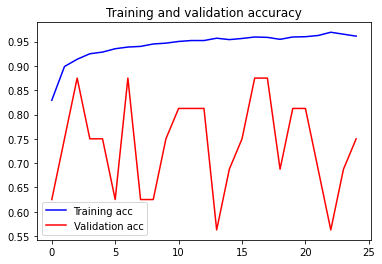

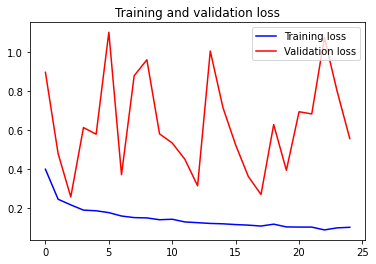

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [20]:
model.save("./TheModel")